## Gradient Boosting 

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [42]:
cancer= load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=0)

In [44]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)


GradientBoostingClassifier(random_state=0)

In [45]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [46]:
# Training set accuracy is 100% --> overfitting 
# Pretruning: 
# Limiting the maximum depth | Lower the learning rate
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [47]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


In [48]:
# Inspect the feature importance 
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)



GradientBoostingClassifier(max_depth=1, random_state=0)

In [49]:
gbrt.feature_importances_

array([0.00000000e+00, 9.07529959e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.32035766e-03, 2.65686907e-01,
       3.49588341e-04, 0.00000000e+00, 0.00000000e+00, 3.00083378e-04,
       0.00000000e+00, 1.45838255e-02, 1.05083243e-03, 0.00000000e+00,
       4.75469106e-03, 0.00000000e+00, 9.56890421e-04, 0.00000000e+00,
       9.23939383e-03, 1.61819935e-02, 3.22495788e-01, 9.24249926e-02,
       6.44041105e-03, 0.00000000e+00, 6.85101108e-03, 2.31450675e-01,
       6.41500790e-03, 3.42225071e-03])

<BarContainer object of 30 artists>

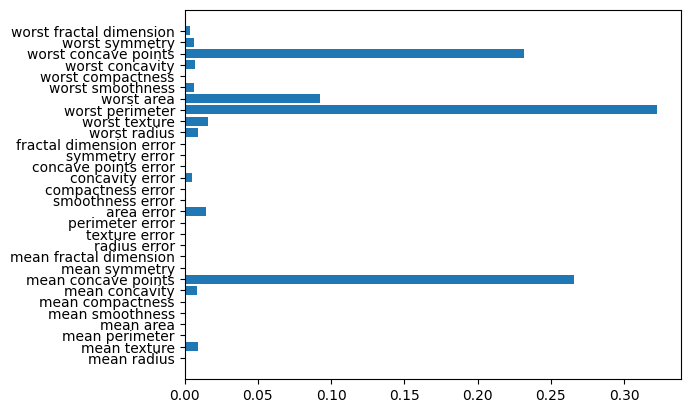

In [50]:
plt.barh(cancer.feature_names, gbrt.feature_importances_)

Text(0.5, 0, 'Gradient Boost Feature Importance')

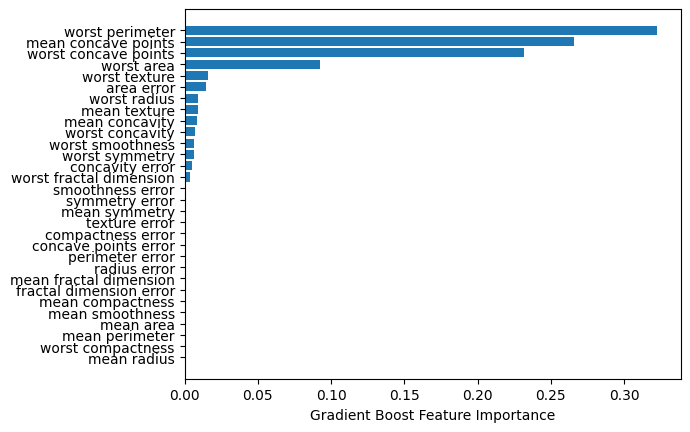

In [51]:
sorted_idx = gbrt.feature_importances_.argsort()
plt.barh(cancer.feature_names[sorted_idx], gbrt.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boost Feature Importance")